## **Required Installation**

In [1]:
!pip install -q fastai fastbook nbdev transformers deep_translator spacy 

## **Necessary packages**

In [2]:
import re
import os
import spacy
import string
import numpy as np
import pandas as pd
from fastai import *
from PIL import Image
from fastbook import *
from fastai.vision.all import *
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from distutils.dir_util import copy_tree
from deep_translator import GoogleTranslator

%matplotlib inline

## **Initial directory**

In [3]:
%cd /kaggle/input/artwork-title-generator

/kaggle/input/artwork-title-generator


## **Fetching sub-folders**

In [4]:
img_folders = os.listdir()
img_folders.remove('csvFiles')
img_folders.remove('cloud_mask')
img_folders.remove('artwork_title_generator_data.csv')
img_folders

['Italy',
 'Japan',
 'UnitedStates',
 'France',
 'Netherlands',
 'China',
 'Germany',
 'England']

## **Copying files to the working directory**

In [5]:
input_path = "/kaggle/input/artwork-title-generator"
output_path = "/kaggle/working/images/"

for folder in img_folders:
    copy_tree(input_path+'/'+folder, output_path+folder)

In [6]:
input_path = "/kaggle/input/artwork-title-generator/csvFiles"
output_path = "/kaggle/working/csvFiles/"

copy_tree(input_path, output_path)

['/kaggle/working/csvFiles/csvFiles/Italy.csv',
 '/kaggle/working/csvFiles/csvFiles/France.csv',
 '/kaggle/working/csvFiles/csvFiles/England.csv',
 '/kaggle/working/csvFiles/csvFiles/Japan.csv',
 '/kaggle/working/csvFiles/csvFiles/Netherlands.csv',
 '/kaggle/working/csvFiles/csvFiles/China.csv',
 '/kaggle/working/csvFiles/csvFiles/Germany.csv',
 '/kaggle/working/csvFiles/csvFiles/UnitedStates.csv']

## **Working directories initialization**

In [7]:
%cd /kaggle/working/

images_path = "images/"
csv_path = "csvFiles/csvFiles"

/kaggle/working


## **Fetching sub-folders in the working directory**

In [8]:
img_folders = os.listdir(images_path)
img_folders

['Germany',
 'Italy',
 'Japan',
 'UnitedStates',
 'England',
 'Netherlands',
 'France',
 'China']

## **Function to view images distribution**

In [9]:
def plot_images_distribution(dic):
  labels = dic.keys()
  number_of_images = list(dic.values())
  range_y = [ i for i in range(0, 14000, 2000)]
  plt.ylim(range_y[0], range_y[len(range_y)-1])
  plt.bar(labels, number_of_images)
  plt.xlabel('Labels')
  plt.xticks(rotation=90)
  plt.ylabel('Number of images')
  plt.title('Images distribiution')
    
  for i in range(len(number_of_images)):
    val = number_of_images[i]
    plt.text(i, val+0.5, str(val), ha='center', va='bottom')

  plt.show()

## **Number of images within folders**

In [10]:
def img_numbers() -> dict: return { folder_name: len(get_image_files_sorted(images_path+'/'+folder_name)) for folder_name in img_folders}

## **Viewing initial images distribution**

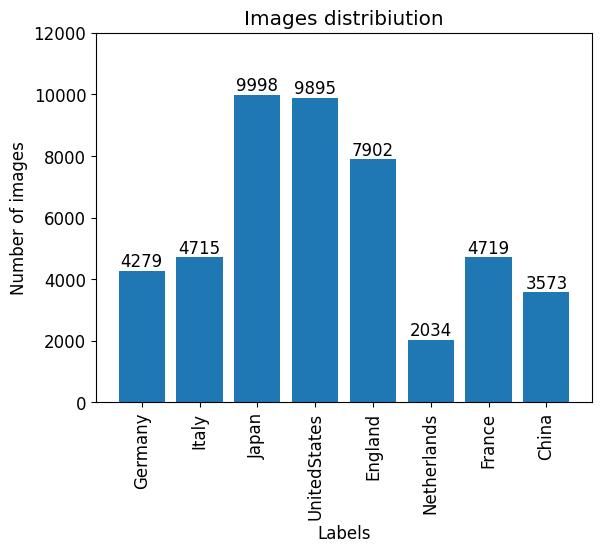

In [11]:
img_dict = img_numbers()
# print(img_dict)
plot_images_distribution(img_dict)

## **Function to verify images**

In [12]:
def image_verification(path, folders):
  for folder in folders:
    failed = verify_images(get_image_files_sorted(path+'/'+folder))
    for img in failed:
      os.remove(img)

## **Verifying images**

In [13]:
image_verification(path = images_path, folders = img_folders)

## **Images distribution after cleaning**

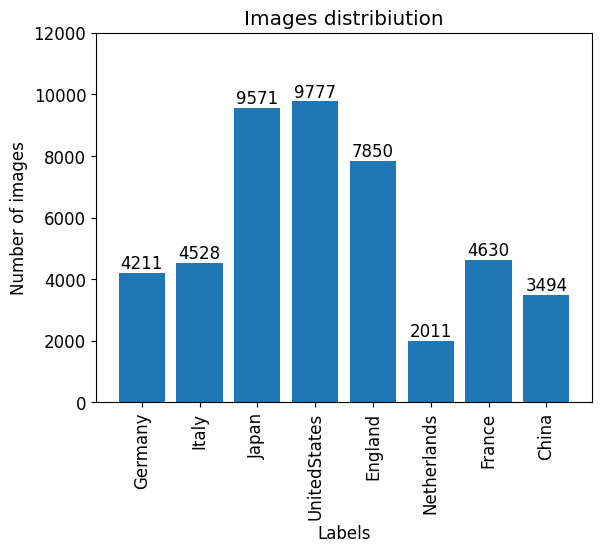

In [14]:
img_dict = img_numbers()
plot_images_distribution(img_dict)

## **Identifying grayscale images**

In [15]:
gray_scale_images = [image_path for folder in img_folders for image_path in get_image_files_sorted(images_path+'/'+folder) if np.array(Image.open(image_path)).ndim not in [3,4]]
len(gray_scale_images)

56

## **Removing grayscale images**

In [16]:
for path in gray_scale_images: 
    os.remove(path)

## **Images distribution after removal**

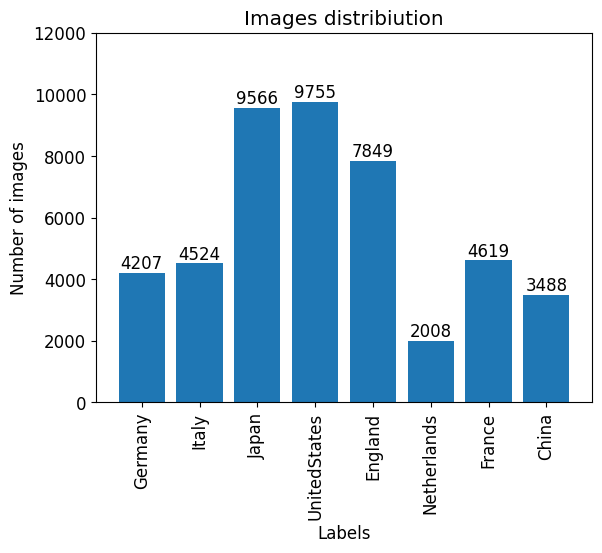

In [17]:
img_dict = img_numbers()
plot_images_distribution(img_dict)

## **Fetching csv files**

In [18]:
files = os.listdir(csv_path)
files

['UnitedStates.csv',
 'England.csv',
 'France.csv',
 'Italy.csv',
 'Germany.csv',
 'China.csv',
 'Japan.csv',
 'Netherlands.csv']

## **Merging and creation of a dataframe**

In [19]:
df = pd.DataFrame()
for file in files:
  data_frame = pd.read_csv(f"{csv_path}/{file}")
  df = pd.concat([df, data_frame], ignore_index = True)

## **Viewing dataframe**

In [20]:
df.head()

,ids,artists,mediums,titles,descriptions,urls
0,usa_1,Alma Thomas,Acrylic on canvas,Starry Night and the Astronauts,"After decades as a representational painter, in her seventies Alma Thomas turned to abstraction, creating shimmering, mosaic-like fields of color with rhythmic dabs of paint that were often inspired by forms from nature. The artist had been fascinated with space exploration since the late 1960s, and her later paintings often referenced America’s manned Apollo missions to the moon. Although she had never flown, Thomas began to paint as if she were in an airplane, capturing what she described as shifting patterns of light and streaks of color. “You look down on things,” she explained. “You s...",https://www.artic.edu/artworks/129884/starry-night-and-the-astronauts
1,usa_2,Kerry James Marshall,Acrylic on paper mounted on canvas,Many Mansions,"Many Mansions is the first in Kerry James Marshall’s series of five large-scale paintings depicting public housing projects in Chicago and Los Angeles such as Rockwell Gardens, Wentworth Gardens, or, as in Many Mansions, Stateway Gardens. Struck by the absurdity of the term “garden” to describe these failed solutions to low-income housing, Marshall was inspired to represent the profound contradictions of living in such an environment. Many Mansions is filled with ironic and startling juxtapositions of the real and artificial—from the unnaturally cheerful landscape to the three haunting, eb...",https://www.artic.edu/artworks/137125/many-mansions
2,usa_3,Joan Mitchell,Oil on linen,City Landscape,"Although influenced by Abstract Expressionist artists in New York in the early 1950s, Joan Mitchell did not prioritize self-expression: her often exuberant abstractions were “about landscape, not about me,” she once explained. Mitchell painted large, light-filled canvases animated by loosely applied skeins of bright color—here infused with the energy of a large metropolis.The title suggests a relationship between the painting’s network of pigments and the nerves or arteries of an urban space. The sense of spontaneity conveyed in City Landscape, however, belies Mitchell’s methods. Unlike ma...",https://www.artic.edu/artworks/86385/city-landscape
3,usa_4,Richard Hunt,Steel,Hero Construction,"Richard Hunt created Hero Construction in 1958, one year after graduating from the School of the Art Institute of Chicago. The sculpture is composed of found objects—old pipes, bits of metal, and automobile parts—that the artist discovered in junkyards and on the street. Using a torch like a paintbrush, Hunt welded these elements into a form that is abstract yet recognizable.Hunt was fascinated with mythology, and Hero Construction can be related to other sculptures past and present, from ancient statues of Greek heroes to modern monuments of statesmen. The modest but monumental stance of ...",https://www.artic.edu/artworks/8633/hero-construction
4,usa_5,Edward Hopper,Oil on canvas,Nighthawks,"About Nighthawks Edward Hopper recollected, “unconsciously, probably, I was painting the loneliness of a large city.” In an all-night diner, three customers sit at the counter opposite a server, each appear to be lost in thought and disengaged from one another. The composition is tightly organized and spare in details: there is no entrance to the establishment, no debris on the streets. Through harmonious geometric forms and the glow of the diner’s electric lighting, Hopper created a serene, beautiful, yet enigmatic scene. Although inspired by a restaurant Hopper had seen on Greenwich Aven...",https://www.artic.edu/artworks/111628/nighthawks


## **Function to view shape**

In [21]:
def df_shape(df):
  print(f'Number of rows: {df.shape[0]}')
  print(f'Number of columns: {df.shape[1]}')

## **Viewing dataframe shape**

In [22]:
df_shape(df)

Number of rows: 47115
Number of columns: 6


## **Checking NaN values**

In [23]:
df.isna().sum()

ids                 0
artists          7129
mediums           307
titles              5
descriptions    41962
urls                0
dtype: int64

## **Fetching working image ids** 

In [24]:
img_ids = []

for folder in img_folders:
  temp = [str(path).split("/")[3].split(".")[0] for path in get_image_files_sorted(f"{images_path}{folder}/")]
  img_ids.extend(temp)
len(img_ids)

46016

## **Fetching corrupted image ids**

In [25]:
corrupted_image_indices_to_drop = [index for index in range(len(df)) if df.iloc[index]['ids'] not in img_ids]
len(corrupted_image_indices_to_drop)

1099

## **Removing corrupted image rows** 

In [26]:
df = df.drop(corrupted_image_indices_to_drop).reset_index(drop=True)

## **Images root path**

In [27]:
images_root_path = "/kaggle/working/images/"

## **Mapping abbreviations with root folder**

In [28]:
path_dict = {
    'ch' : 'China',
    'eng' : 'England',
    'Fra' : 'France',
    'ger' : 'Germany',
    'itl' : 'Italy',
    'jp' : 'Japan',
    'nl' : 'Netherlands',
    'usa' : 'UnitedStates'    
}

## **Listing image paths**

In [29]:
image_paths = [ f"{images_root_path}{path_dict[df.iloc[i]['ids'].split('_')[0]]}/{path_dict[df.iloc[i]['ids'].split('_')[0]]}/{df.iloc[i]['ids']}.jpg" for i in range(len(df))]
image_paths[:5]

['/kaggle/working/images/UnitedStates/UnitedStates/usa_1.jpg',
 '/kaggle/working/images/UnitedStates/UnitedStates/usa_2.jpg',
 '/kaggle/working/images/UnitedStates/UnitedStates/usa_3.jpg',
 '/kaggle/working/images/UnitedStates/UnitedStates/usa_4.jpg',
 '/kaggle/working/images/UnitedStates/UnitedStates/usa_5.jpg']

## **New column with image paths**

In [30]:
df['images_path'] = image_paths

In [31]:
df = df.drop(columns=['artists', 'mediums', 'descriptions', 'urls'], axis=1)
df_shape(df)

Number of rows: 46016
Number of columns: 3


In [32]:
df.isna().sum()

ids            0
titles         5
images_path    0
dtype: int64

In [33]:
df = df.dropna().reset_index(drop=True)

In [34]:
df['titles'][:20]

0                                     Starry Night and the Astronauts
1                                                       Many Mansions
2                                                      City Landscape
3                                                   Hero Construction
4                                                          Nighthawks
5                                                Blue and Green Music
6                                                     American Gothic
7                                                          Excavation
8                                       Cow’s Skull with Calico Roses
9                                                 Sky above Clouds IV
10                                                                Mao
11                                                           The Rock
12                                                     Greyed Rainbow
13              That Which I Should Have Done I Did Not Do (The Door)
14                  

## **Punctuation removal**

In [35]:
translation_table = str.maketrans('', '', string.punctuation)
df['titles'] = df['titles'].apply(lambda x: x.translate(translation_table).replace('“','').replace('”', '').replace('–',''))
df['titles'][:20]

0                                   Starry Night and the Astronauts
1                                                     Many Mansions
2                                                    City Landscape
3                                                 Hero Construction
4                                                        Nighthawks
5                                              Blue and Green Music
6                                                   American Gothic
7                                                        Excavation
8                                     Cow’s Skull with Calico Roses
9                                               Sky above Clouds IV
10                                                              Mao
11                                                         The Rock
12                                                   Greyed Rainbow
13              That Which I Should Have Done I Did Not Do The Door
14                                              

## **Digits removal**

In [36]:
# Removing digits
df['titles'] = df['titles'].apply(lambda x: re.sub(r'\d+', '', x))
df['titles'][:20]

0                                   Starry Night and the Astronauts
1                                                     Many Mansions
2                                                    City Landscape
3                                                 Hero Construction
4                                                        Nighthawks
5                                              Blue and Green Music
6                                                   American Gothic
7                                                        Excavation
8                                     Cow’s Skull with Calico Roses
9                                               Sky above Clouds IV
10                                                              Mao
11                                                         The Rock
12                                                   Greyed Rainbow
13              That Which I Should Have Done I Did Not Do The Door
14                                              

## **Lowercasing the title**

In [37]:
# Lowercasing the title
df['titles'] = df['titles'].apply(lambda x: x.lower())
df['titles'][:20]

0                                   starry night and the astronauts
1                                                     many mansions
2                                                    city landscape
3                                                 hero construction
4                                                        nighthawks
5                                              blue and green music
6                                                   american gothic
7                                                        excavation
8                                     cow’s skull with calico roses
9                                               sky above clouds iv
10                                                              mao
11                                                         the rock
12                                                   greyed rainbow
13              that which i should have done i did not do the door
14                                              

## **Space Removal**

In [38]:
# Removing spaces
df['titles'] = df['titles'].apply(lambda x: " ".join(x.split()))
df['titles'][:20]

0                                   starry night and the astronauts
1                                                     many mansions
2                                                    city landscape
3                                                 hero construction
4                                                        nighthawks
5                                              blue and green music
6                                                   american gothic
7                                                        excavation
8                                     cow’s skull with calico roses
9                                               sky above clouds iv
10                                                              mao
11                                                         the rock
12                                                   greyed rainbow
13              that which i should have done i did not do the door
14                                              

## **Removing empty titles**

In [39]:
df.isna().sum()

ids            0
titles         0
images_path    0
dtype: int64

In [40]:
df = df.dropna().reset_index(drop=True)

In [41]:
indices_to_drop = [i for i, title in enumerate(df['titles']) if title == '']
len(indices_to_drop)

26

In [42]:
df = df.drop(indices_to_drop).reset_index(drop=True)

## **Translating all titles to English**

In [43]:
translator = GoogleTranslator(source='auto', target='en')

# Conversion all sentences to english

pattern = r'[^a-z\s]'

df['titles'] = df['titles'].apply(lambda x: translator.translate(x) if bool(re.search(pattern, x)) == True else x)
df['titles'][-1:-30]

Series([], Name: titles, dtype: object)

In [44]:
df['titles'].value_counts().to_dict()

{'untitled': 726,
 'fragment': 521,
 'protest surrounding the construction of narita airport': 246,
 'panel': 244,
 'pendant': 145,
 'selfportrait': 117,
 'border': 112,
 'wine glass': 106,
 'panel furnishing fabric': 104,
 'sutra cover': 100,
 'swatch of furnishing fabric': 99,
 'vase': 61,
 'sampler': 58,
 'bowl': 58,
 'kesa': 53,
 'snuff bottle': 52,
 'landscape': 50,
 'fukusa gift cover': 45,
 'nude': 42,
 'splash point a stormy day sunshine after a shower': 40,
 'chicago': 38,
 'the software chart questionnare': 38,
 'beaker': 34,
 'cong': 33,
 'design on paper': 33,
 'study for a plate from the task': 33,
 'study for a plate from telemachus': 33,
 'waistcoat design': 32,
 'plate': 30,
 'plate from moonstrip empire news': 30,
 'cover': 29,
 'bidisc': 29,
 'ring': 28,
 'untitled from circulation october': 28,
 'paperweight': 28,
 'still life': 27,
 'plate from telemachus': 26,
 'a sheet from a shunga album': 26,
 'bedcover': 26,
 'goblet': 25,
 'study': 25,
 'trouser band': 25,
 'd

## **Removing Stopwords**

In [45]:
nlp = spacy.load('en_core_web_sm')
df['titles'] = df['titles'].apply(lambda x: ' '.join([token.text for token in nlp(x) if not token.is_stop]))

## **Creating a title count dictionary if multiple same title exists** 

In [46]:
titles_dict = df['titles'].value_counts().to_dict()

In [47]:
titles_dict

{'untitled': 733,
 'fragment': 521,
 'protest surrounding construction narita airport': 246,
 'panel': 244,
 'pendant': 145,
 'selfportrait': 138,
 'border': 112,
 'wine glass': 106,
 'panel furnishing fabric': 104,
 'sutra cover': 100,
 'swatch furnishing fabric': 99,
 'vase': 62,
 'sampler': 58,
 'bowl': 58,
 'kesa': 53,
 'snuff bottle': 52,
 'landscape': 52,
 '': 47,
 'fukusa gift cover': 45,
 'nude': 43,
 'splash point stormy day sunshine shower': 40,
 'software chart questionnare': 38,
 'chicago': 38,
 'beaker': 34,
 'design paper': 33,
 'cong': 33,
 'study plate telemachus': 33,
 'study plate task': 33,
 'waistcoat design': 32,
 'cover': 30,
 'life': 30,
 'plate moonstrip empire news': 30,
 'plate': 30,
 'bidisc': 29,
 'ring': 28,
 'untitled circulation october': 28,
 'paperweight': 28,
 'adoration magi': 28,
 'bedcover': 26,
 'sheet shunga album': 26,
 'fragment border': 26,
 'plate telemachus': 26,
 'study': 25,
 'dish': 25,
 'goblet': 25,
 'trouser band': 25,
 'untitled distor

## **Mapping title with multiple counts**

In [48]:
multiple_same_titles = {key: 0 for key, value in titles_dict.items() if value > 1}

In [49]:
len(multiple_same_titles)

4870

## **Keeping one value removing rows having titles with same values** 

In [50]:
indices_to_drop = []

for i in range(len(df)):
  if df.iloc[i]['titles'] in multiple_same_titles.keys() and multiple_same_titles[df.iloc[i]['titles']] == 0:
    multiple_same_titles[df.iloc[i]['titles']] = 1
  elif df.iloc[i]['titles'] in multiple_same_titles.keys() and multiple_same_titles[df.iloc[i]['titles']] == 1:
    indices_to_drop.append(i)

len(indices_to_drop)

12762

## **Removing indices**

In [51]:
df = df.drop(indices_to_drop).reset_index(drop=True)

## **Deleting redundant columns for workings**

In [52]:
# df = df.drop(columns=['artists', 'mediums', 'descriptions', 'urls'], axis=1)
df.head()

,ids,titles,images_path
0,usa_1,starry night astronauts,/kaggle/working/images/UnitedStates/UnitedStates/usa_1.jpg
1,usa_2,mansions,/kaggle/working/images/UnitedStates/UnitedStates/usa_2.jpg
2,usa_3,city landscape,/kaggle/working/images/UnitedStates/UnitedStates/usa_3.jpg
3,usa_4,hero construction,/kaggle/working/images/UnitedStates/UnitedStates/usa_4.jpg
4,usa_5,nighthawks,/kaggle/working/images/UnitedStates/UnitedStates/usa_5.jpg


In [53]:
df_shape(df)

Number of rows: 33223
Number of columns: 3


## **Cheking if NaN value exists in the final data**

In [54]:
df.isna().sum()

ids            0
titles         0
images_path    0
dtype: int64

In [55]:
df = df.dropna().reset_index(drop=True)

## **Dropping NaN value rows**

In [56]:
indices_to_drop = [i for i, title in enumerate(df['titles']) if title == '']
len(indices_to_drop)

df = df.drop(indices_to_drop).reset_index(drop=True)

## **Checking final dataframe shape**

In [57]:
df['titles'].value_counts().to_dict()

{'starry night astronauts': 1,
 'stag chamois': 1,
 'rocks trees river': 1,
 'rape proserpine': 1,
 'seated man mantle thatched hut': 1,
 'travellers landscape': 1,
 'men traveling hills mules packs dog': 1,
 'landscape herdsman sheep goat cattle': 1,
 'rocks water': 1,
 'shegoat': 1,
 'virgin mary st john evangelist beholding vision cross held angels': 1,
 'bust male saint praying': 1,
 'market woman horseback': 1,
 'sheep lying': 1,
 'shepherdess sheep': 1,
 'cowherd bull dog ruins': 1,
 'peasant apple peddler': 1,
 'bust man hat': 1,
 'danae shower gold': 1,
 'standing prophet arm raised': 1,
 'vulcan making arms achilles venus cupid look': 1,
 'salt box': 1,
 'basin possibly use lavabo': 1,
 'illuminated initial h prayerbook': 1,
 'duchess': 1,
 'meadow': 1,
 'young woman reading': 1,
 'battle scene overdoor decoration': 1,
 'decorative groups putti trumpets fruit': 1,
 'lion lioness': 1,
 'carving medusa head': 1,
 'saint peter visiting saint agatha prison healing wounds': 1,
 'la

In [58]:
df_shape(df)

Number of rows: 33222
Number of columns: 3


In [59]:
final_image_count = {value: 0 for key, value in path_dict.items()}
final_image_count

{'China': 0,
 'England': 0,
 'France': 0,
 'Germany': 0,
 'Italy': 0,
 'Japan': 0,
 'Netherlands': 0,
 'UnitedStates': 0}

In [60]:
for id in df['ids']:
  final_image_count[path_dict[id.split("_")[0]]] += 1
final_image_count

{'China': 1774,
 'England': 5321,
 'France': 3798,
 'Germany': 2853,
 'Italy': 2837,
 'Japan': 7272,
 'Netherlands': 1372,
 'UnitedStates': 7995}

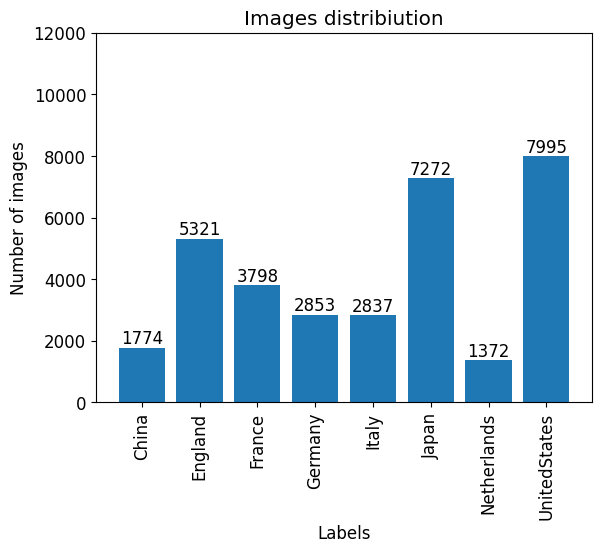

In [61]:
plot_images_distribution(final_image_count)

## **Viewing final dataframe**

In [62]:
df.head()

,ids,titles,images_path
0,usa_1,starry night astronauts,/kaggle/working/images/UnitedStates/UnitedStates/usa_1.jpg
1,usa_2,mansions,/kaggle/working/images/UnitedStates/UnitedStates/usa_2.jpg
2,usa_3,city landscape,/kaggle/working/images/UnitedStates/UnitedStates/usa_3.jpg
3,usa_4,hero construction,/kaggle/working/images/UnitedStates/UnitedStates/usa_4.jpg
4,usa_5,nighthawks,/kaggle/working/images/UnitedStates/UnitedStates/usa_5.jpg


In [63]:
text = ""
for title in df['titles']:
  text += " "+title

/kaggle/input/artwork-title-generator


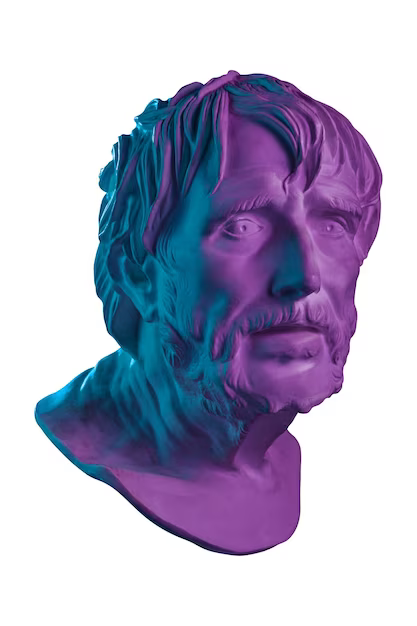

In [64]:
%cd /kaggle/input/artwork-title-generator
image = Image.open('cloud_mask/artifact_1.png')
image

In [65]:
mask = np.array(image)

In [66]:
%cd /kaggle/working/

/kaggle/working


In [67]:
word_cloud = WordCloud(
    collocations = False,
    background_color = 'white',
    mask = mask,
    contour_color = 'white',
    contour_width = 1
).generate(text)

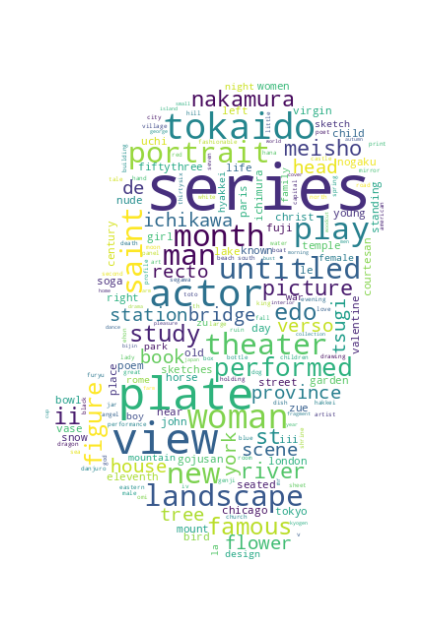

In [68]:
plt.figure(figsize=(15,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud.png')
plt.show()

## **Exporting to final .csv file**

In [69]:
df.to_csv('artwork_title_generator_data_noise_removed.csv', index = False)